In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
insurance=pd.read_csv('insurance.csv')

In [318]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [319]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [320]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [321]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [322]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [323]:
insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [324]:
## Encoding
insurance['sex'] = insurance['sex'].replace({'male': 0, 'female': 1})

In [325]:
insurance['sex'].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [326]:
insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [327]:
## Encoding
insurance['smoker'] = insurance['smoker'].replace({'no': 0, 'yes': 1})

In [328]:
insurance['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [329]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [330]:
insurance['region'] = insurance['region'].replace({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4})

In [331]:
insurance['region'].value_counts()

region
1    364
2    325
3    325
4    324
Name: count, dtype: int64

In [332]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [333]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [334]:
# # Suponiendo que 'insurance' es tu DataFrame
# insurance = insurance.drop(['sex', 'children', 'region'], axis=1)

In [335]:
## Independent And dependent features
X=insurance.drop('charges',axis=1)
y=insurance['charges']

In [336]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,2
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [337]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [338]:
X_train.shape,X_test.shape

((1003, 6), (335, 6))

In [339]:
X_train.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,0.012385,0.111325,0.055070,-0.037916,0.005694
sex,0.012385,1.000000,-0.001931,-0.016610,-0.054671,-0.030661
bmi,0.111325,-0.001931,1.000000,-0.003459,-0.001499,-0.253039
children,0.055070,-0.016610,-0.003459,1.000000,0.025488,0.034438
smoker,-0.037916,-0.054671,-0.001499,0.025488,1.000000,-0.018491
region,0.005694,-0.030661,-0.253039,0.034438,-0.018491,1.000000


<Axes: >

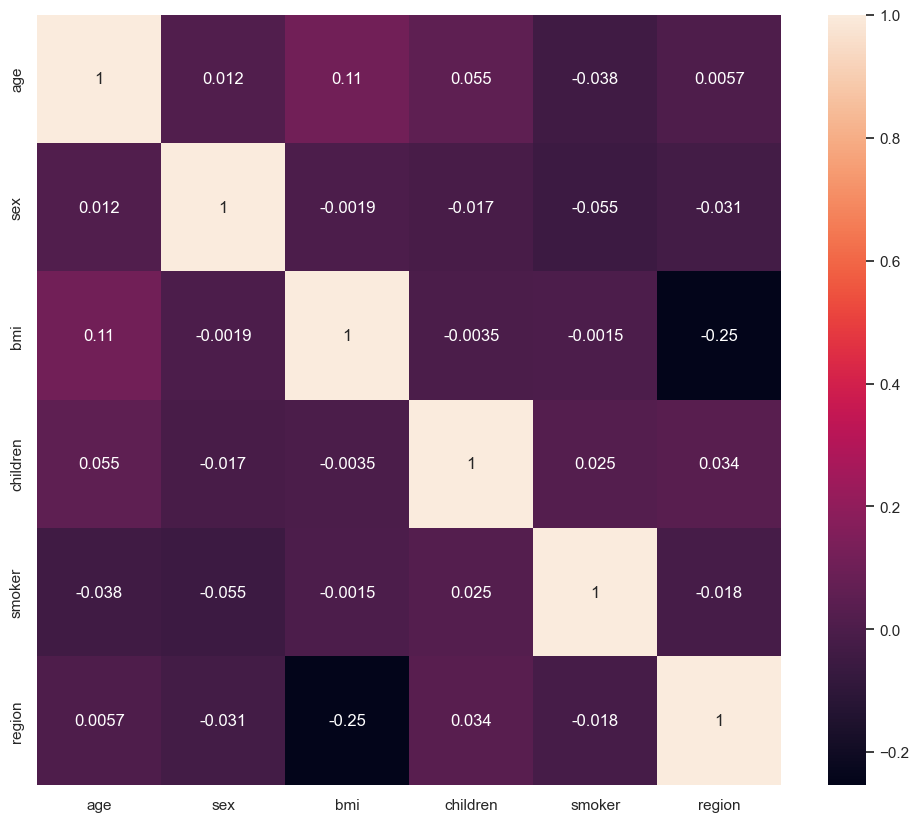

In [340]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [341]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [342]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [343]:
corr_features

set()

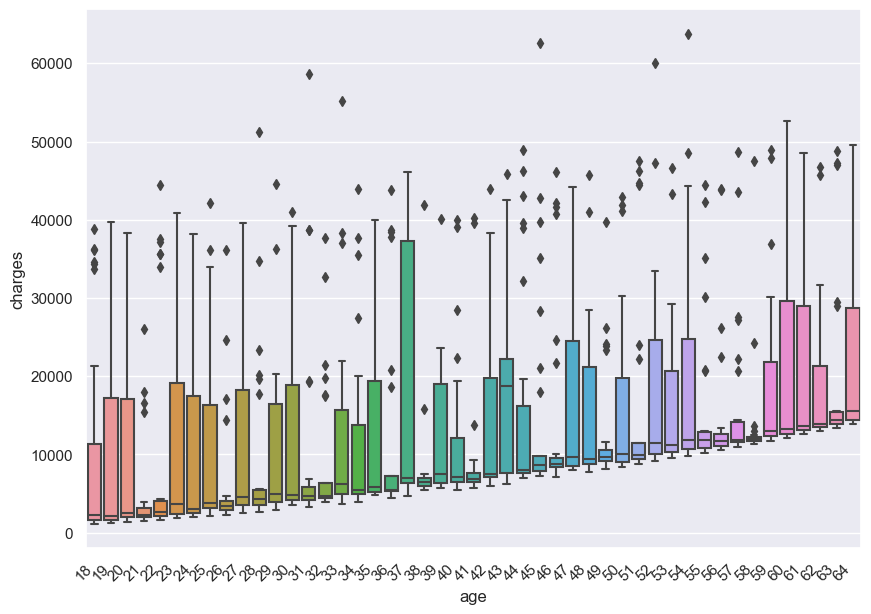

In [344]:
plt.subplots(figsize=(10,7))
ax=sns.boxplot(x='age', y='charges', data=insurance)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

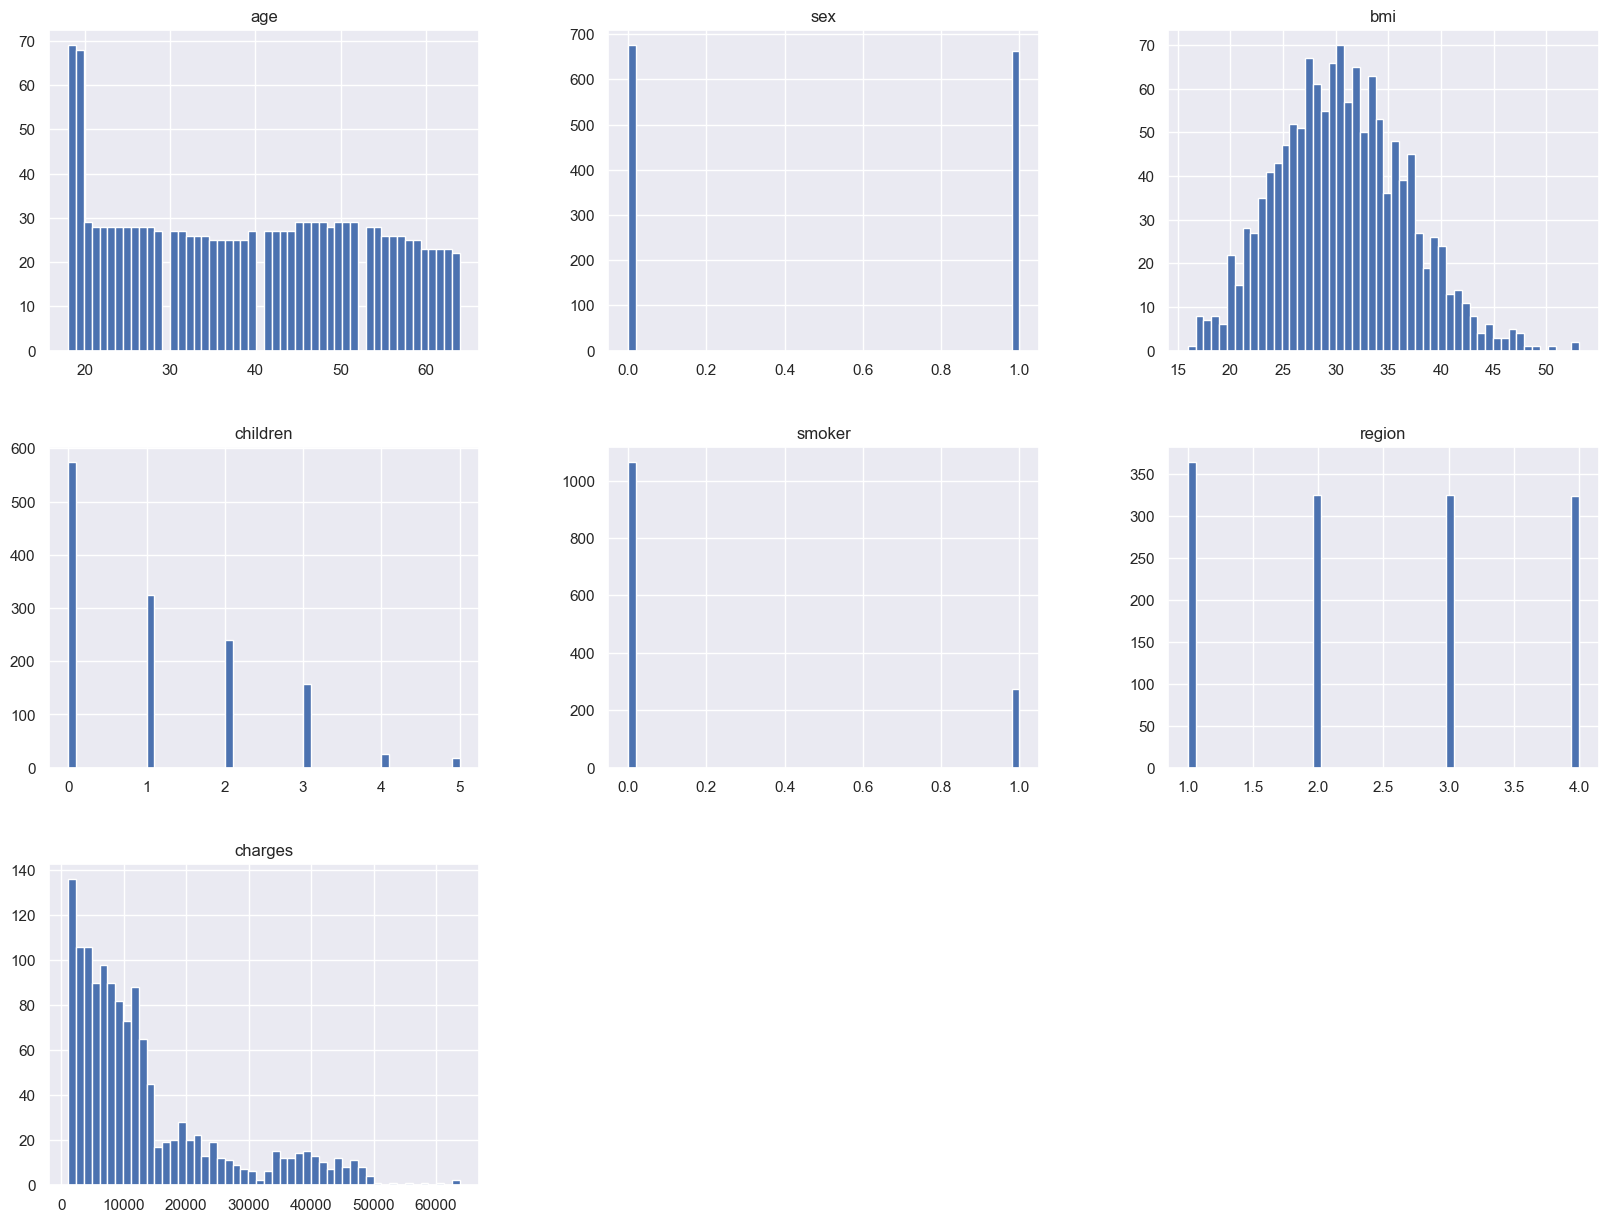

In [345]:
sns.set() #We are using seaborn to make the plots look better. This adds some styling to our plots. You can try removing this and see how the plot looks.
insurance.hist(bins=50,figsize=(20,15))
plt.show()

Text(0, 0.5, 'charges')

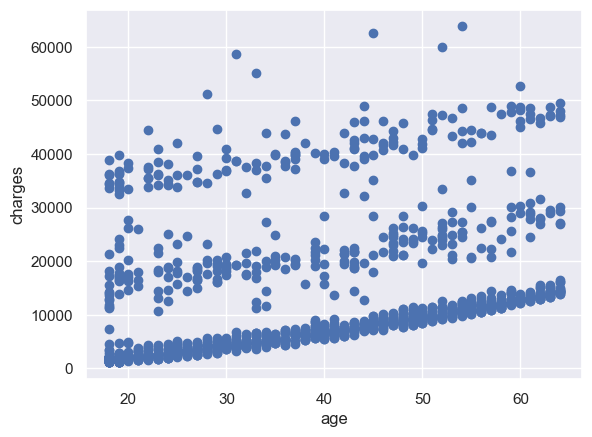

In [346]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('age')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

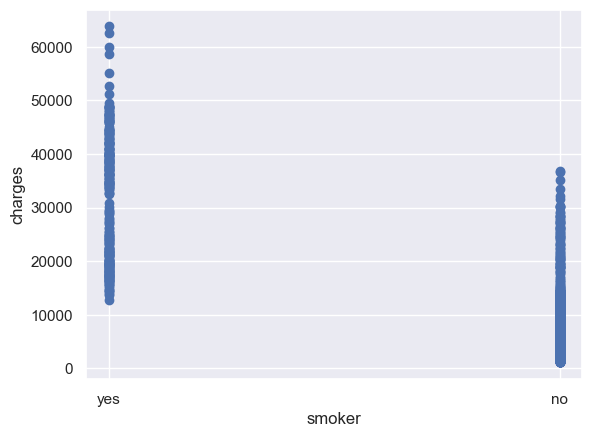

In [347]:
plt.scatter(df['smoker'], df['charges'])
plt.xlabel('smoker')
plt.ylabel('charges')

In [348]:
# Normalizar las variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [349]:
X_train_scaled

array([[-1.08716652, -0.99106682, -1.14087456, -0.91749963, -0.50839872,
         0.45531212],
       [-0.80210593,  1.0090137 , -0.66584152,  0.7436053 , -0.50839872,
        -1.32164531],
       [ 0.83699246, -0.99106682,  1.52879447, -0.08694717, -0.50839872,
        -0.43316659],
       ...,
       [ 1.33584849, -0.99106682, -0.8879673 , -0.91749963, -0.50839872,
         1.34379084],
       [-0.1607196 ,  1.0090137 ,  2.84324666,  0.7436053 ,  1.9669601 ,
        -0.43316659],
       [ 1.12205304, -0.99106682, -0.10179179, -0.91749963, -0.50839872,
        -0.43316659]])

C:\Users\Jaime\AppData\Local\Temp\ipykernel_55944\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

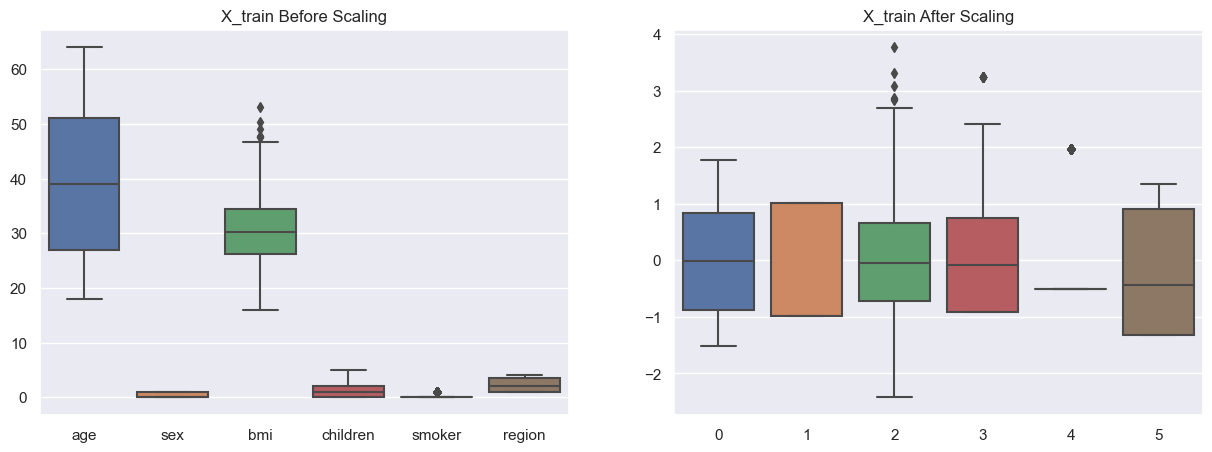

In [350]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Mean absolute error 4234.686737226889
R2 Score 0.7673698638169364


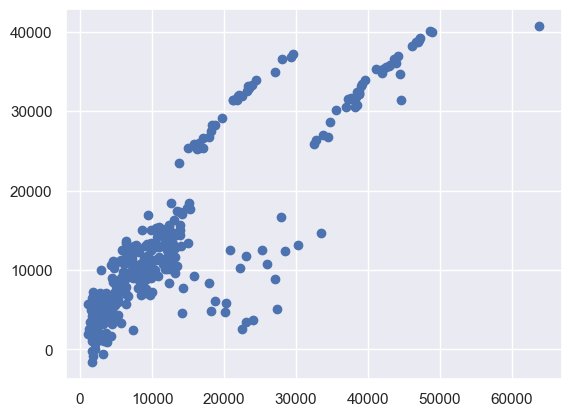

In [351]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [ ]:
#Lasso Regression

Mean absolute error 4234.664025408914
R2 Score 0.7673646606655862


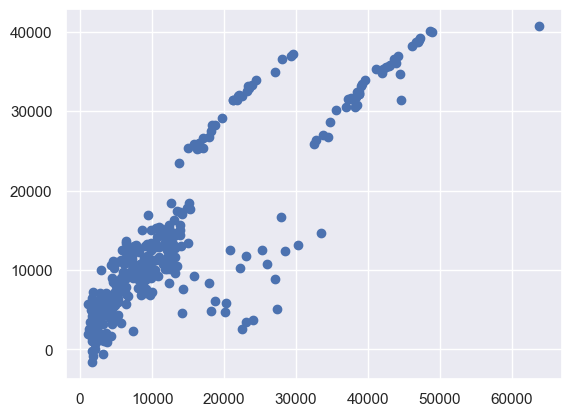

In [352]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 4236.321172461026
R2 Score 0.76733210471958


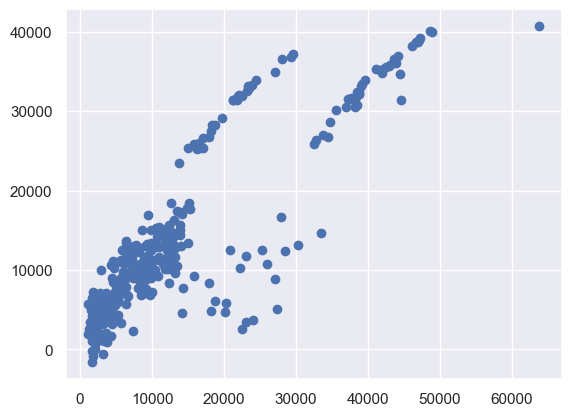

In [353]:
## Ridge Regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [355]:
import pickle
pickle.dump(scaler, open('insurance_scaler.pkl', 'wb'))
pickle.dump(lasso, open('insurance_lasso.pkl', 'wb'))
